In [1]:
import os.path as osp
import csv
import json
import sys
import numpy as np

def load_attributes(attr_list_path=None):
    """
    Returns mappings: {attribute_id -> attribute_name} and {attribute_id -> idx}
    where attribute_id = 'aXX_YY' (string),
    attribute_name = description (string),
    idx \in [0, 67] (int)
    :return:
    """
    if attr_list_path is None:
        attributes_path = 'attributes.tsv'
    else:
        attributes_path = attr_list_path
    attr_id_to_name = dict()
    attr_id_to_idx = dict()

    with open(attributes_path, 'r') as fin:
        ts = csv.DictReader(fin, delimiter='\t')
        rows = filter(lambda r: r['idx'] is not '', [row for row in ts])

        for row in rows:
            attr_id_to_name[row['attribute_id']] = row['description']
            attr_id_to_idx[row['attribute_id']] = int(row['idx'])

    return attr_id_to_name, attr_id_to_idx

In [2]:
def evaluate():
    # Load Attributes --------------------------------------------------------------------------------------------------
    attr_id_to_name, attr_id_to_idx = load_attributes()
    print(attr_id_to_name)
    print(attr_id_to_idx)
    idx_to_attr_id = {v: k for k, v in attr_id_to_idx.items()}
    from collections import defaultdict

    # Load predictions -------------------------------------------------------------------------------------------------
    # Construct a list of dicts containing: GT labels, Prediction probabilities, Image path
    pred_list = []
    with open('pap_out.txt', 'r') as f:
        for _line in f:
            line = _line.strip()
            dct = json.loads(line)

            pred_entry = dict()
            pred_entry['pred_probs'] = np.asarray(dct['pred_probs'], dtype=float)
            pred_entry['image_path'] = dct['image_path']
            pred_list.append(pred_entry)

    i = 0
    for pred in pred_list:
        sys.stdout.write("Processing %d/%d (%.2f%% done) \r" % (i + 1, len(pred_list),
                                                                    (i + 1) * 100.0 / len(pred_list)))
        sys.stdout.flush()
        text_str = ''
        pred_probs = pred['pred_probs']
        top_10_inds = np.argsort(-pred_probs)[:10]
        #'a12_semi_nudity', 'a59_sports', 'a46_occupation', 'a64_rel_personal', 'a65_rel_social', 'a58_hobbies'
        for aidx in top_10_inds:
            if pred_probs[aidx] > 0.9 and idx_to_attr_id[aidx] in ['a12_semi_nudity']:
                text_str += '{:<30} {:.3f}\n'.format(idx_to_attr_id[aidx], pred_probs[aidx])
                print(text_str)
                print(pred['image_path'])
        i += 1
evaluate()

{'a0_safe': 'Safe', 'a1_age_approx': 'Age Group', 'a2_weight_approx': 'Weight Group', 'a3_height_approx': 'Height Group', 'a4_gender': 'Gender', 'a5_eye_color': 'Eye Color', 'a6_hair_color': 'Hair Color', 'a7_fingerprint': 'Fingerprint', 'a8_signature': 'Signature', 'a9_face_complete': 'Face (Complete)', 'a10_face_partial': 'Face (Partial)', 'a11_tattoo': 'Tattoo', 'a12_semi_nudity': 'Semi-nudity', 'a13_full_nudity': 'Complete nudity', 'a16_race': 'Race', 'a17_color': 'Skin Color', 'a18_ethnic_clothing': 'Traditional clothing', 'a19_name_full': 'Full Name', 'a20_name_first': 'First Name', 'a21_name_last': 'Last Name', 'a23_birth_city': 'Place of Birth', 'a24_birth_date': 'Date of Birth', 'a25_nationality': 'Nationality', 'a26_handwriting': 'Handwriting', 'a27_marital_status': 'Marital status', 'a29_ausweis': 'National Identification', 'a30_credit_card': 'Credit Card', 'a31_passport': 'Passport', 'a32_drivers_license': 'Drivers License', 'a33_student_id': 'Student ID', 'a35_mail': 'Mail

a12_semi_nudity                0.997

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BoxingSpeedBag/v_BoxingSpeedBag_g20_c05.png
a12_semi_nudity                0.904

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BoxingSpeedBag/v_BoxingSpeedBag_g16_c02.png
a12_semi_nudity                0.919

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BoxingSpeedBag/v_BoxingSpeedBag_g01_c02.png
a12_semi_nudity                0.993

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BoxingSpeedBag/v_BoxingSpeedBag_g02_c03.png
a12_semi_nudity                1.000

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BoxingSpeedBag/v_BoxingSpeedBag_g16_c04.png
a12_semi_nudity                1.000

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BoxingSpeedBag/v_BoxingSpeedBag_g23_c02.png
a12_semi_nudity                1.000

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BoxingSpeedBag/v_BoxingSpeedBag_g23_c05.png
a12_semi_nudity                0.998

/home/wuzhenyu_sj

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



a12_semi_nudity                0.933

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BabyCrawling/v_BabyCrawling_g11_c01.png
a12_semi_nudity                0.998

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BabyCrawling/v_BabyCrawling_g08_c01.png
a12_semi_nudity                0.947

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BabyCrawling/v_BabyCrawling_g05_c02.png
a12_semi_nudity                0.995

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BabyCrawling/v_BabyCrawling_g08_c02.png
a12_semi_nudity                0.999

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/BabyCrawling/v_BabyCrawling_g05_c05.png
a12_semi_nudity                0.974

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/PlayingViolin/v_PlayingViolin_g19_c01.png
a12_semi_nudity                0.950

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/PlayingViolin/v_PlayingViolin_g17_c03.png
a12_semi_nudity                0.998

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



a12_semi_nudity                1.000

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/JumpingJack/v_JumpingJack_g12_c01.png
a12_semi_nudity                0.997

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/IceDancing/v_IceDancing_g13_c01.png
a12_semi_nudity                0.935

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/IceDancing/v_IceDancing_g14_c02.png
a12_semi_nudity                0.961

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/IceDancing/v_IceDancing_g18_c02.png
a12_semi_nudity                0.994

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/ParallelBars/v_ParallelBars_g23_c02.png
a12_semi_nudity                0.999

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/ShavingBeard/v_ShavingBeard_g18_c02.png
a12_semi_nudity                0.905

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/ShavingBeard/v_ShavingBeard_g18_c04.png
a12_semi_nudity                0.986

/home/wuzhenyu_sjtu/vpa/pap_real_data/UCF-101_frames/Shavin

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle

def save_obj(obj, name):
    with open('obj/ucf101/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/ucf101/' + name + '.pkl', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        return u.load()

In [2]:
import operator

attr_id_count = load_obj('attr_id_count_top10_0.1')
attr_id_count = sorted(attr_id_count.items(), key=operator.itemgetter(1), reverse=True)

attr_id_ordered = [k for k, v in attr_id_count]
#print(attr_id_ordered)
attr_id_conf = load_obj('attr_id_conf_top10_0.1')
attr_id_conf_mean = {k: np.mean(np.asarray(v,dtype=np.float)) for k, v in attr_id_conf.items()}
attr_id_conf_mean = list(attr_id_conf_mean.items())
#print(attr_id_conf_mean)
attr_id_conf_mean.sort(key=lambda x: attr_id_ordered.index(x[0]))

#attr_id_conf_mean = sorted(attr_id_conf_mean.items(), key=operator.itemgetter(1), reverse=True)
print(attr_id_conf_mean)
#attr_id_conf_std = {k: np.std(np.asarray(v,dtype=np.float)) for k, v in attr_id_conf.items()}
#attr_id_conf_std = sorted(attr_id_conf_std.items(), key=operator.itemgetter(1), reverse=True)

[('a17_color', 0.91798997012466876), ('a6_hair_color', 0.90166793039060811), ('a4_gender', 0.88570787558854314), ('a1_age_approx', 0.87723853203125413), ('a16_race', 0.8617910382961631), ('a2_weight_approx', 0.84793910464830269), ('a10_face_partial', 0.74737684102950042), ('a9_face_complete', 0.80045400331408378), ('a0_safe', 0.83442380000757488), ('a59_sports', 0.8088747870105818), ('a5_eye_color', 0.78546096238440521), ('a3_height_approx', 0.65571232326564832), ('a46_occupation', 0.61015465626129728), ('a65_rel_social', 0.67002528677698481), ('a58_hobbies', 0.64633811760259108), ('a12_semi_nudity', 0.66071909888090996), ('a66_rel_professional', 0.70068005029968072), ('a48_occassion_work', 0.5196030630106977), ('a64_rel_personal', 0.51518763879786678), ('a99_legal_involvement', 0.5369638194684434), ('a57_culture', 0.61114740876293683), ('a70_education_history', 0.51792268111155582), ('a19_name_full', 0.33848728135388384), ('a39_disability_physical', 0.43059262822745209), ('a20_name_fi

In [3]:
print(attr_id_count)
print(attr_id_conf_mean)
#print(attr_id_conf_std)

[('a17_color', 9964), ('a6_hair_color', 9349), ('a4_gender', 9063), ('a1_age_approx', 7720), ('a16_race', 7649), ('a2_weight_approx', 5164), ('a10_face_partial', 4634), ('a9_face_complete', 4252), ('a0_safe', 3718), ('a59_sports', 3348), ('a5_eye_color', 2902), ('a3_height_approx', 1578), ('a46_occupation', 1302), ('a65_rel_social', 1169), ('a58_hobbies', 1037), ('a12_semi_nudity', 651), ('a66_rel_professional', 618), ('a48_occassion_work', 278), ('a64_rel_personal', 268), ('a99_legal_involvement', 226), ('a57_culture', 189), ('a70_education_history', 143), ('a19_name_full', 93), ('a39_disability_physical', 59), ('a20_name_first', 53), ('a11_tattoo', 52), ('a74_address_current_complete', 43), ('a60_occassion_personal', 31), ('a67_rel_competitors', 29), ('a41_injury', 26), ('a102_vehicle_ownership', 23), ('a18_ethnic_clothing', 17), ('a79_address_home_partial', 17), ('a61_opinion_general', 14), ('a13_full_nudity', 14), ('a78_address_home_complete', 11), ('a69_rel_views', 10), ('a7_finge

In [4]:
keys = []
values = []
for k, v in attr_id_conf_mean:
    keys.append(k)
    values.append(v)
print(keys)
print(values)

['a17_color', 'a6_hair_color', 'a4_gender', 'a1_age_approx', 'a16_race', 'a2_weight_approx', 'a10_face_partial', 'a9_face_complete', 'a0_safe', 'a59_sports', 'a5_eye_color', 'a3_height_approx', 'a46_occupation', 'a65_rel_social', 'a58_hobbies', 'a12_semi_nudity', 'a66_rel_professional', 'a48_occassion_work', 'a64_rel_personal', 'a99_legal_involvement', 'a57_culture', 'a70_education_history', 'a19_name_full', 'a39_disability_physical', 'a20_name_first', 'a11_tattoo', 'a74_address_current_complete', 'a60_occassion_personal', 'a67_rel_competitors', 'a41_injury', 'a102_vehicle_ownership', 'a18_ethnic_clothing', 'a79_address_home_partial', 'a61_opinion_general', 'a13_full_nudity', 'a78_address_home_complete', 'a69_rel_views', 'a7_fingerprint', 'a103_license_plate_complete', 'a82_date_time', 'a56_sexual_orientation', 'a32_drivers_license', 'a30_credit_card', 'a43_medicine', 'a92_email_content', 'a26_handwriting', 'a62_opinion_political', 'a104_license_plate_partial', 'a21_name_last', 'a35_ma

In [5]:
def plot_bar(keys, values):
    # this is for plotting purpose
    plt.figure(figsize=(80,40))
    index = np.arange(len(keys))
    plt.bar(index, values)
    plt.xlabel('Attribute ID', fontsize=60)
    plt.ylabel('Confidence', fontsize=60)
    plt.xticks(index, keys, fontsize=30, rotation=75)
    plt.yticks(fontsize=45)
    plt.title('Attribute-wise Prediction Confidence on UCF101',fontsize=90)
    plt.savefig('pap_ucf101.png')
    plt.show()

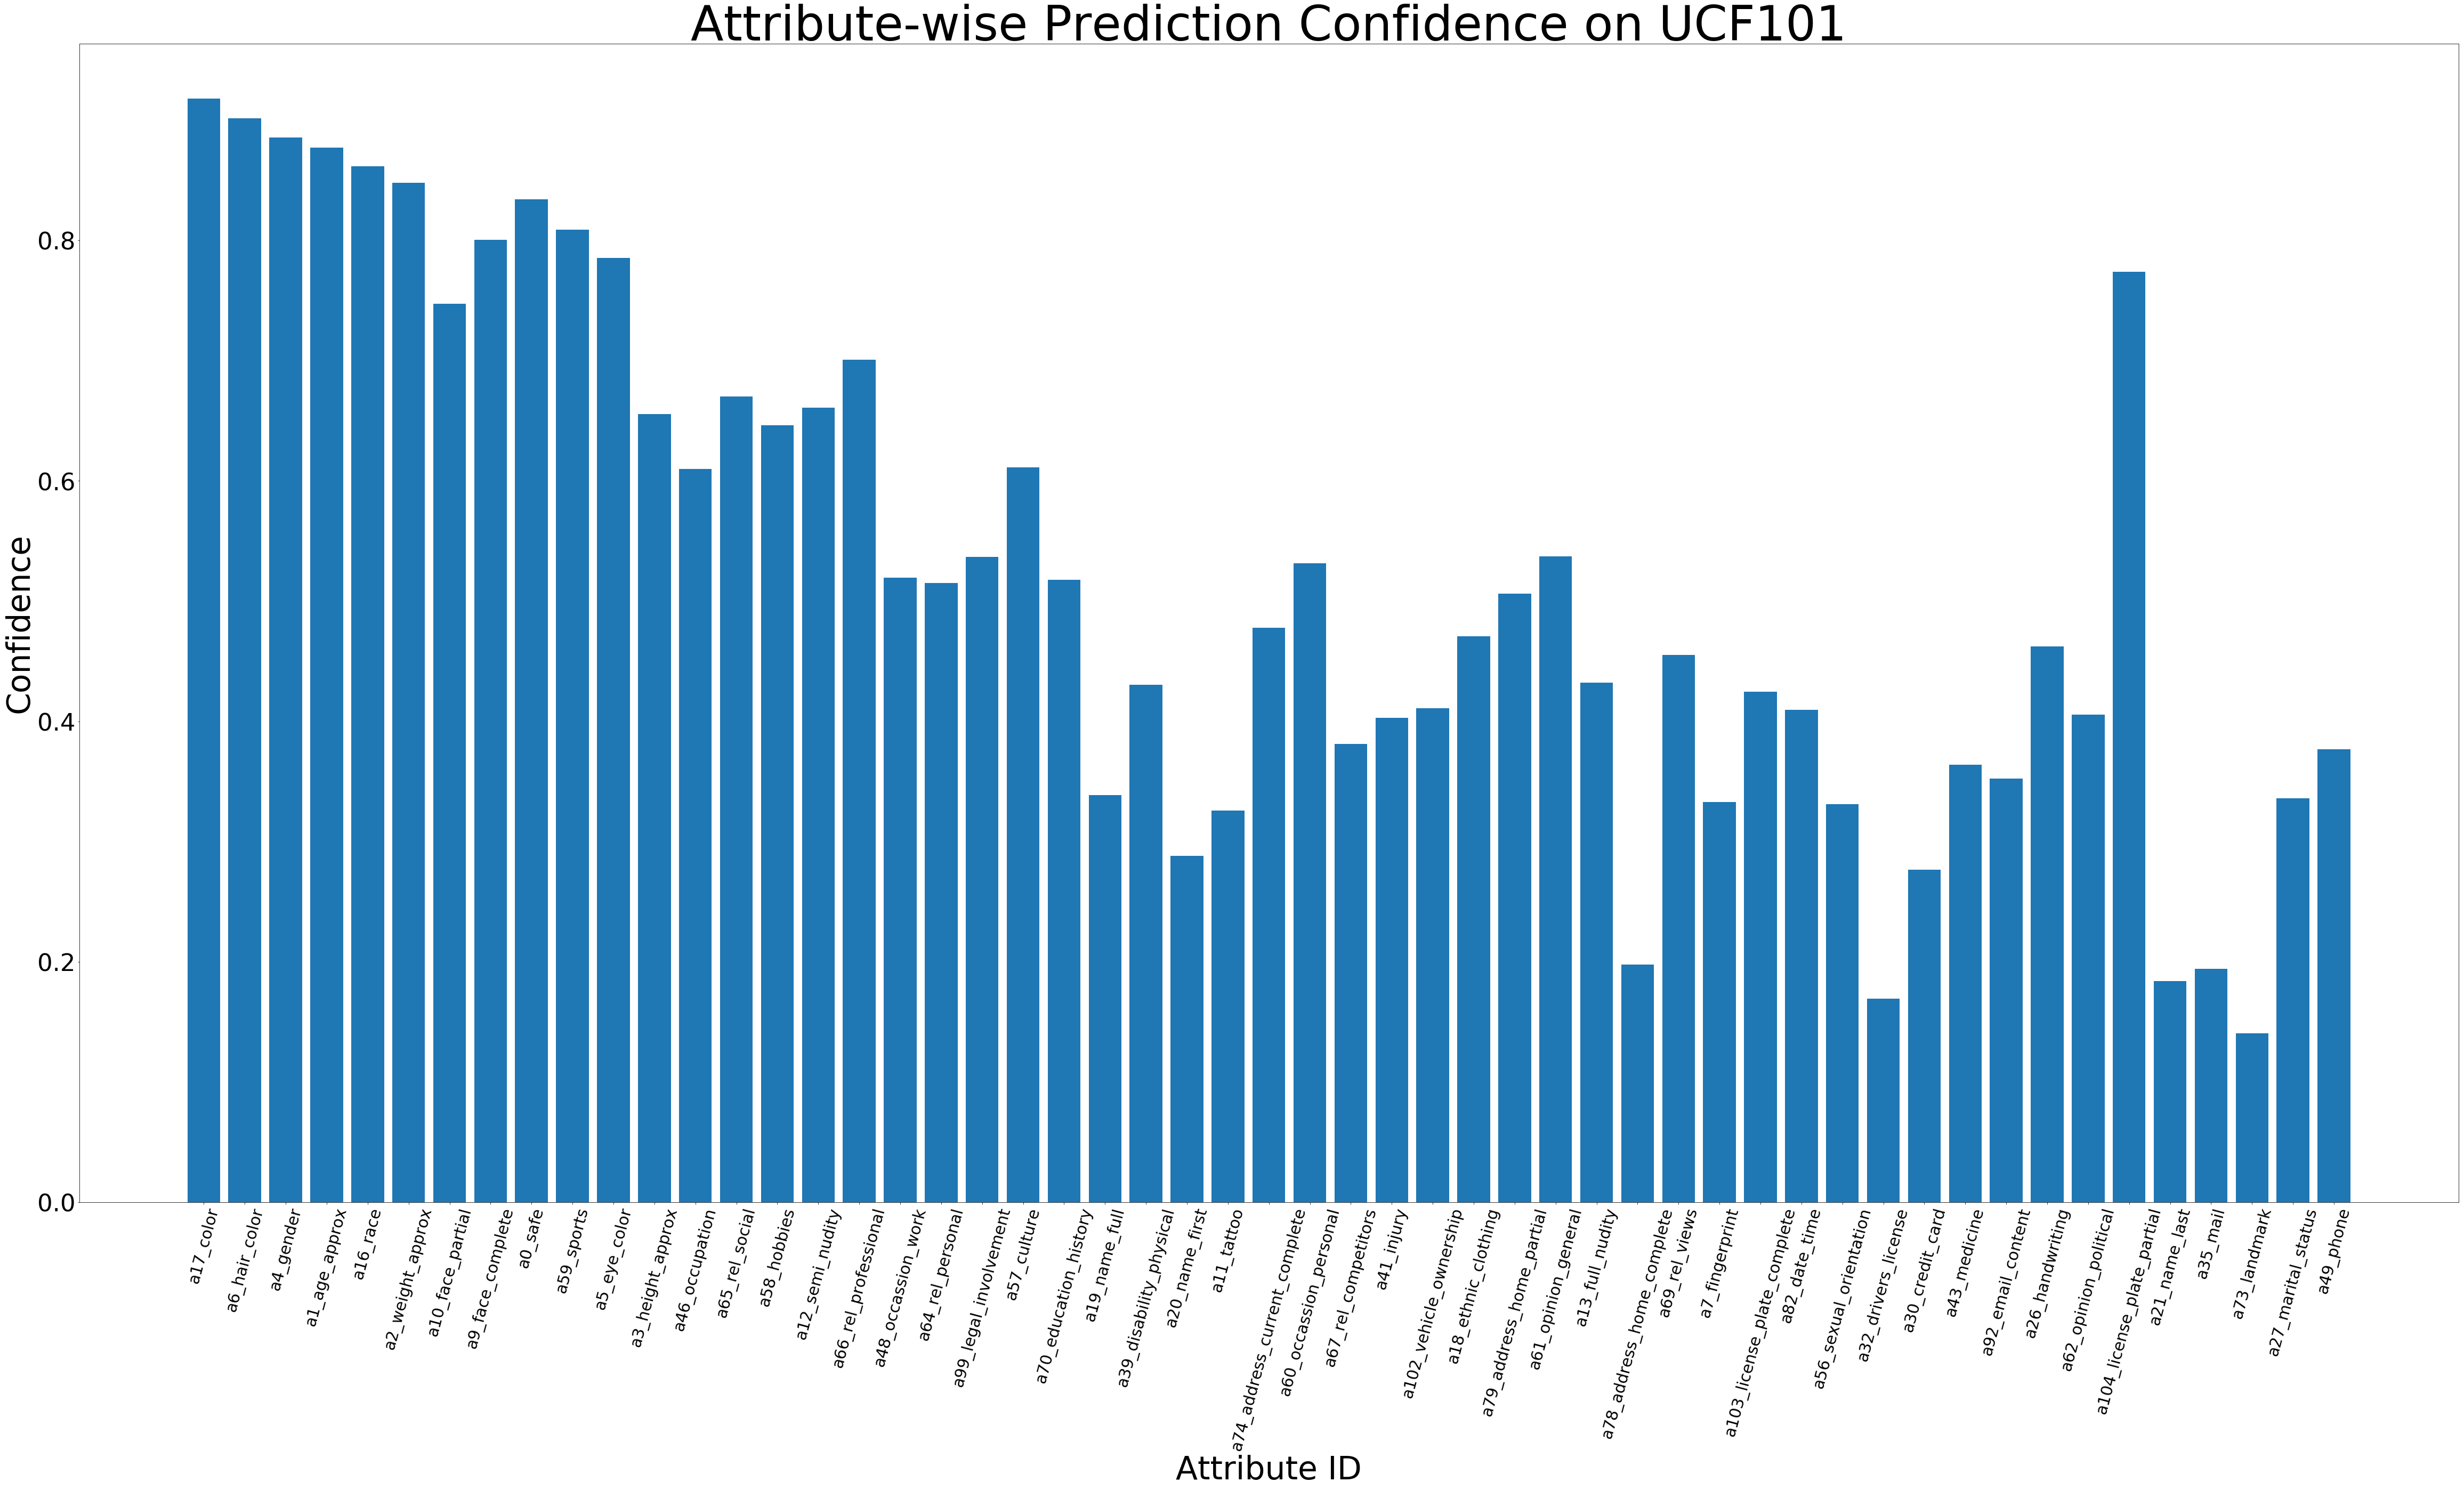

In [6]:
plot_bar(keys, values)